In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [2]:
df.shape

(1000, 40)

In [3]:
# Exploratory Data Analysis


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# Important observations :
# 0)There are 1000 rows and 40 columns
# 2) Most Features are numeric,continuous and onject type with one feature as float

In [5]:
# Statistical summary
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# checking for null values in dataset

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# Replacing ? values in dataset with Nan values

df=df.replace('?',np.NaN)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# Dropping unnecessary _c39 column

df=df.drop('_c39',axis=1)

In [10]:
#Filling null values

df['police_report_available'].fillna('NO', inplace = True) #Filling null values with 'NO' in police_report_available column

df['property_damage'].fillna('NO', inplace = True) #Filling null values with 'NO' in property_damage column

df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True) #Filling null values with max mode in collision_type column

In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

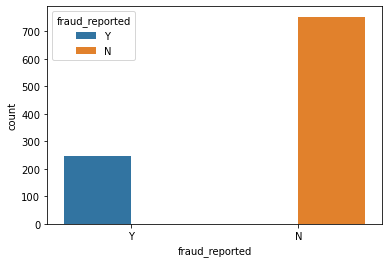

In [12]:
# DATA VISUALIZATION :

sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

# Clearly dataset is imbalanced.We will check on it later

In [13]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

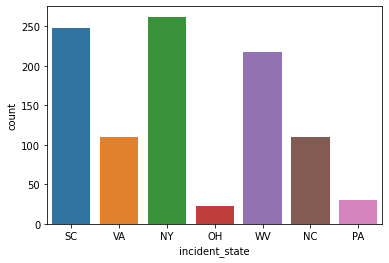

In [14]:
sns.countplot(x='incident_state', data=df)

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

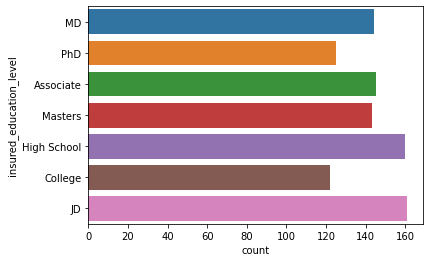

In [15]:
sns.countplot(y = 'insured_education_level', data=df) 

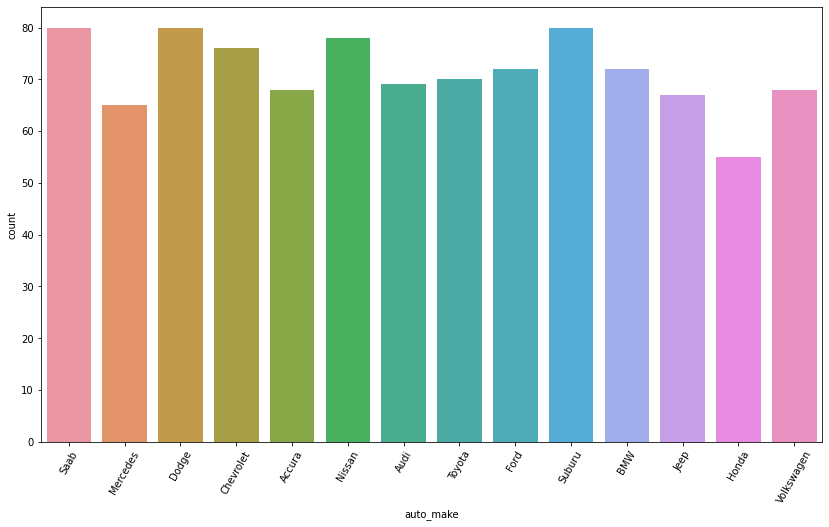

In [16]:

plt.figure(figsize=(14,8))
sns.countplot(x='auto_make', data=df)
plt.xticks(rotation=60)
plt.show()

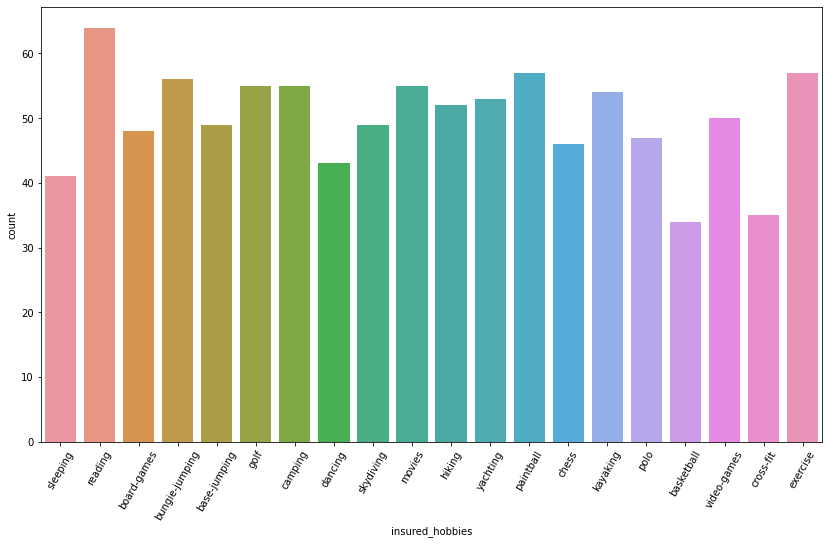

In [17]:

plt.figure(figsize=(14,8))
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=60)
plt.show()

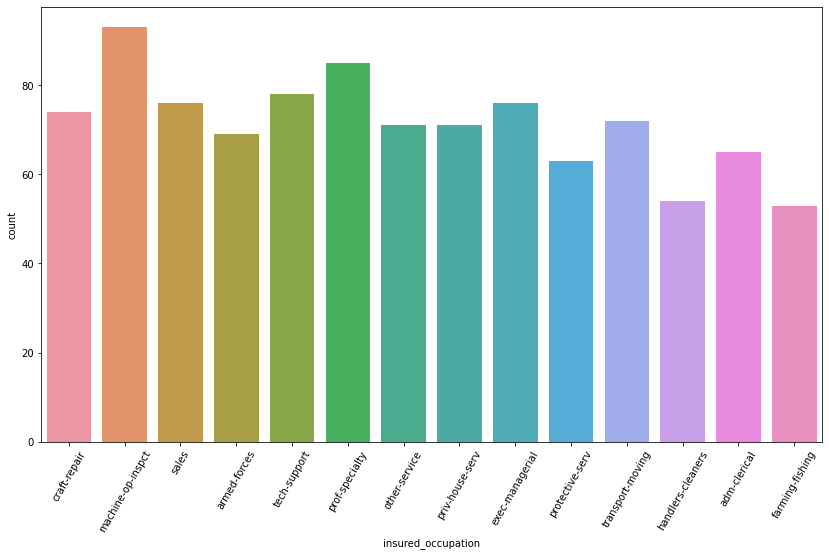

In [18]:

plt.figure(figsize=(14,8))
sns.countplot(x='insured_occupation', data=df)
plt.xticks(rotation=60)
plt.show()

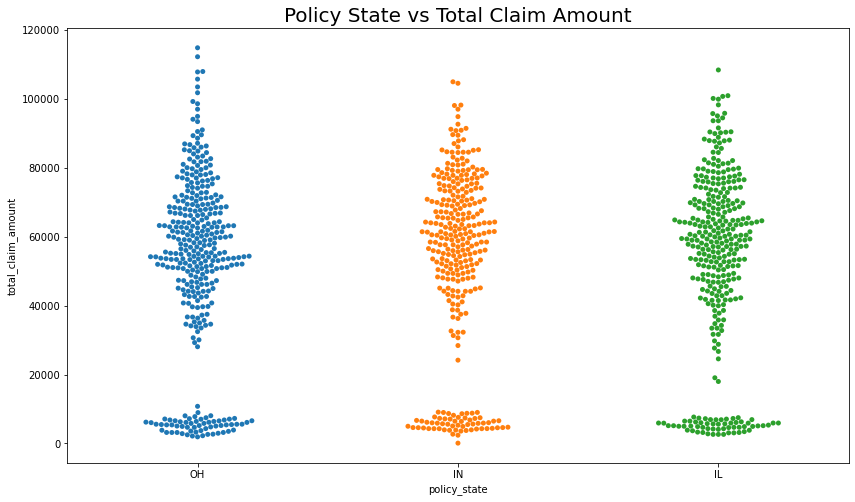

In [19]:

plt.figure(figsize=(14,8))
sns.swarmplot(df['policy_state'], df['total_claim_amount'])
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [20]:
# dropping unnecessary columns

df = df.drop(columns = ['policy_number', 'insured_zip','policy_bind_date','incident_date','incident_location','auto_year','incident_hour_of_the_day'])

In [21]:
# List of all categorical variables

cat_col=['policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]

In [22]:
# converting categorical features into ordinal

le= LabelEncoder()
for i in cat_col:   
    df[i] = le.fit_transform(df[i]) 

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,0,6500,1300,650,4550,0,31,0


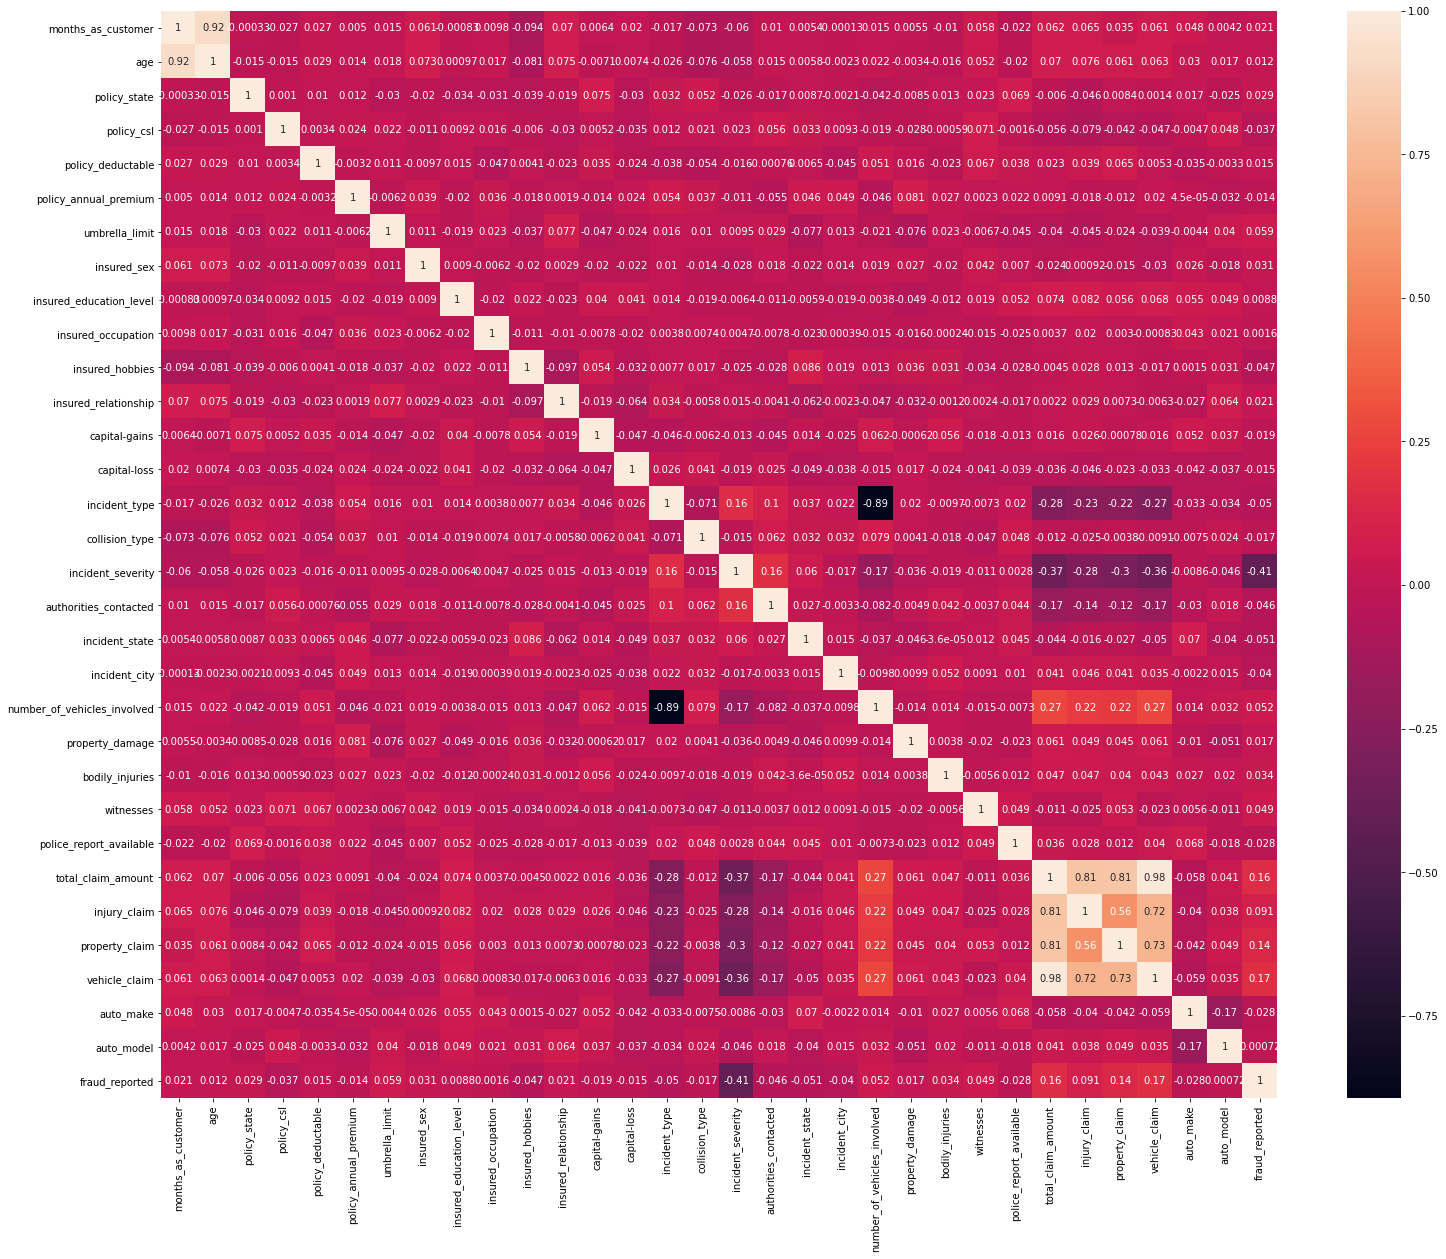

In [24]:
# checking correlation of independent variables with 'fraud_reported' variable

plt.figure(figsize=(25,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [25]:
# Splitting the dataset

X = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [26]:

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_sample(X, y.values.ravel())

X = pd.DataFrame(X)
y = pd.DataFrame(y)


In [27]:
# Evaluating models

# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  3
best accuracy score for LogisticRegression :  0.6194690265486725


In [28]:
# Accuracy score for LogisticRegression on training data

y_pred_lr_train = model_lr_1.predict(X_train)
score_train=accuracy_score(y_train,y_pred_lr_train)
print('best accuracy score for LogisticRegression on training data : ',score_train)

best accuracy score for LogisticRegression on training data :  0.5645161290322581


In [30]:
# finding classification_report for LogisticRegression

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       223
           1       0.59      0.63      0.61       229

    accuracy                           0.59       452
   macro avg       0.59      0.59      0.59       452
weighted avg       0.59      0.59      0.59       452



In [31]:
# finding cross validation score 

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.6016425120772946


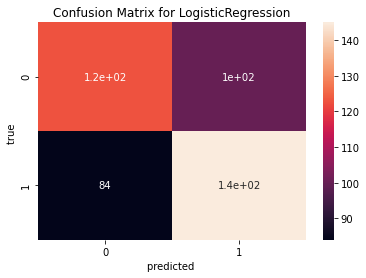

In [32]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [33]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  8
best accuracy score for DecisionTreeClassifier :  0.8252212389380531


In [34]:
# Accuracy score for DecisionTreeClassifier on training data

y_pred_dtc_train = model_dtc.predict(X_train)
score_train=accuracy_score(y_train,y_pred_dtc_train)
print('best accuracy score for DecisionTreeClassifier on training data : ',score_train)

best accuracy score for DecisionTreeClassifier on training data :  1.0


In [35]:
# Clearly model is overfitting .Need to confirm with cross val score

In [36]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       223
           1       0.75      0.87      0.81       229

    accuracy                           0.79       452
   macro avg       0.80      0.79      0.79       452
weighted avg       0.79      0.79      0.79       452



In [37]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.7125603864734299


In [38]:
# With cross_val_score ,it is confirmed that model is overfitting

In [39]:
# Training the model using  KNeighborsClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_knc = KNeighborsClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knc.fit(X_train, y_train)
    y_pred_knc = model_knc.predict(X_test)
    score=accuracy_score(y_test,y_pred_knc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)


best random_state :  24
best accuracy score :  0.7278761061946902


In [40]:
# Accuracy score for KNeighborsClassifier on training data

y_pred_knc_train = model_knc.predict(X_train)
score_train=accuracy_score(y_train,y_pred_knc_train)
print('best accuracy score for KNeighborsClassifier on training data : ',score_train)

best accuracy score for KNeighborsClassifier on training data :  0.7960151802656547


In [41]:
# finding classification_report for KNeighborsClassifier

print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       217
           1       0.70      0.84      0.76       235

    accuracy                           0.73       452
   macro avg       0.74      0.72      0.72       452
weighted avg       0.74      0.73      0.72       452



In [42]:
# finding cross validation score for  KNeighborsClassifier

accuracy = cross_val_score( KNeighborsClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print(accuracy)

0.6105314009661835


In [43]:
# Minimizing overfitting using Ridge technique

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =0)
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
model_r=Ridge()
clf=GridSearchCV(model_r,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [44]:
model_r =Ridge(alpha=0.0001,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =0)
model_r.fit(X_train,y_train)
y_pred_r=model_r.predict(X_test)
score_r= accuracy_score(y_test,np.round(abs(y_pred_r)),normalize=False)
score_r

360

In [45]:
# HYPERPARAMETER TUNING OF KNeighborsClassifier

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knn_range = list(range(1, 25))
param_grid = dict(n_neighbors=knn_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  



In [46]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#GCV.fit(x_train,y_train)
grid.best_params_  # Printing the best parameter found by GridSearchCV

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'n_neighbors': 1}

In [47]:

GCV_pred=grid.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test,GCV_pred)    # checking final accuracy


0.7876106194690266

In [ ]:
# Clearly Hyperparameter tuning of model improved accuracy of the KNeighborsClassifier model

In [48]:
# print classification report
print(classification_report(y_test, GCV_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       225
           1       0.75      0.86      0.80       227

    accuracy                           0.79       452
   macro avg       0.79      0.79      0.79       452
weighted avg       0.79      0.79      0.79       452



In [ ]:
# Final accuracy_score clearly states that KNeighborsClassifier model is very good enough to predict 'Fraud'

In [49]:
# AUC_ROC curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.3)

knn_1= KNeighborsClassifier()
knn_1.fit(X_train,y_train)
y_predicted_knn_1=knn_1.predict(X_test)


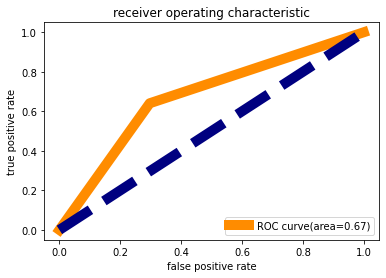

In [50]:

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_predicted_knn_1,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of KNeighborsClassifier model for predicting 'Fraud'

In [51]:
# Exporting the model through pickle

import pickle
filename='Insurance_claim_fraud.pkl'
pickle.dump(knn_1,open(filename,'wb'))